In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D

In [2]:
t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

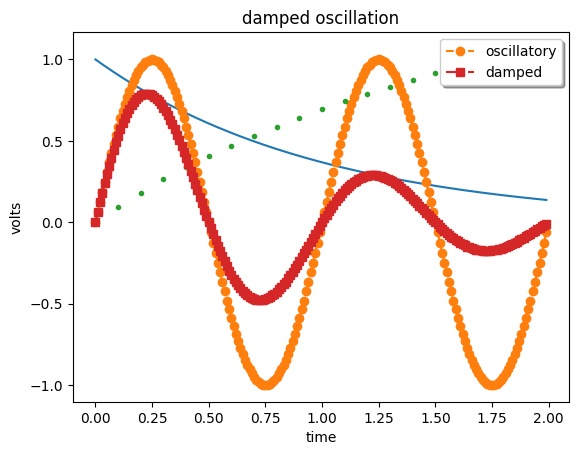

In [3]:
fig, ax = plt.subplots()

l1, = ax.plot(t2, np.exp(-t2))
l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), "--o", t1, np.log(1 + t1), ".")
l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), "s-.")

ax.legend((l2, l4), ("oscillatory", "damped"), loc="upper right", shadow=True)
ax.set_xlabel("time")
ax.set_ylabel("volts")
ax.set_title("damped oscillation")

plt.show()

In [4]:
x = np.linspace(0, 1)

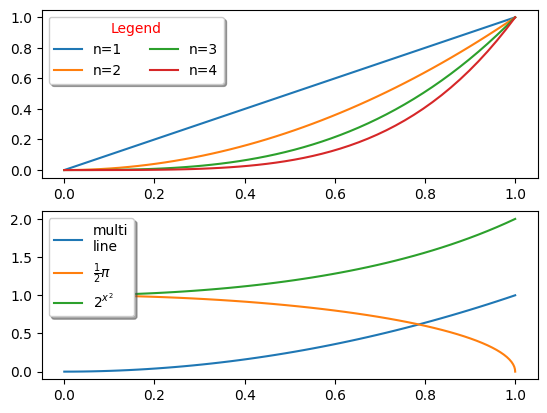

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1)

for n in range(1, 5):
    ax1.plot(x, x ** n, label=f"n={n}")

leg = ax1.legend(
    loc="upper left", bbox_to_anchor=[0, 1], ncol=2,
    shadow=True, title="Legend", fancybox=True,
)
leg.get_title().set_color("red")

ax2.plot(x, x ** 2, label="multi\nline")
half_pi = np.linspace(0, np.pi / 2)
ax2.plot(np.sin(half_pi), np.cos(half_pi), label=r"$\frac{1}{2}\pi$")
ax2.plot(x, 2 ** (x ** 2), label="$2^{x^2}$")
ax2.legend(shadow=True, fancybox=True)

plt.show()

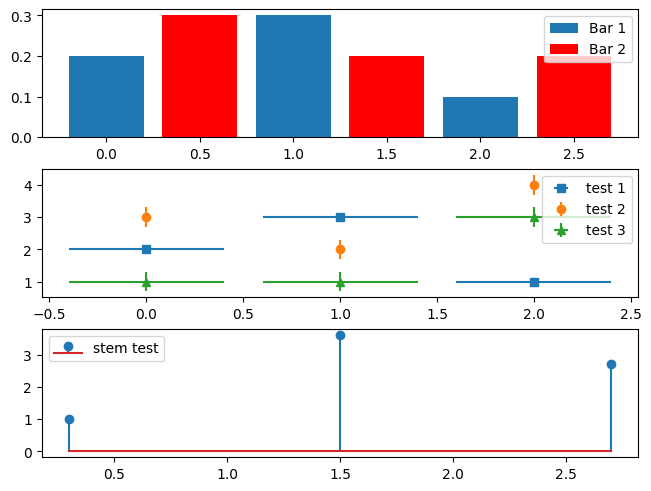

In [6]:
fig, axs = plt.subplots(3, 1, constrained_layout=True)
top_ax, middle_ax, bottom_ax = axs

top_ax.bar([0, 1, 2], [0.2, 0.3, 0.1], width=0.4, label="Bar 1", align="center")
top_ax.bar([0.5, 1.5, 2.5], [0.3, 0.2, 0.2], color="red", width=0.4, label="Bar 2", align="center")
top_ax.legend()

middle_ax.errorbar([0, 1, 2], [2, 3, 1], xerr=0.4, fmt="s", label="test 1")
middle_ax.errorbar([0, 1, 2], [3, 2, 4], yerr=0.3, fmt="o", label="test 2")
middle_ax.errorbar([0, 1, 2], [1, 1, 3], xerr=0.4, yerr=0.3, fmt="^", label="test 3")
middle_ax.legend()

bottom_ax.stem([0.3, 1.5, 2.7], [1, 3.6, 2.7], label="stem test")
bottom_ax.legend()

plt.show()

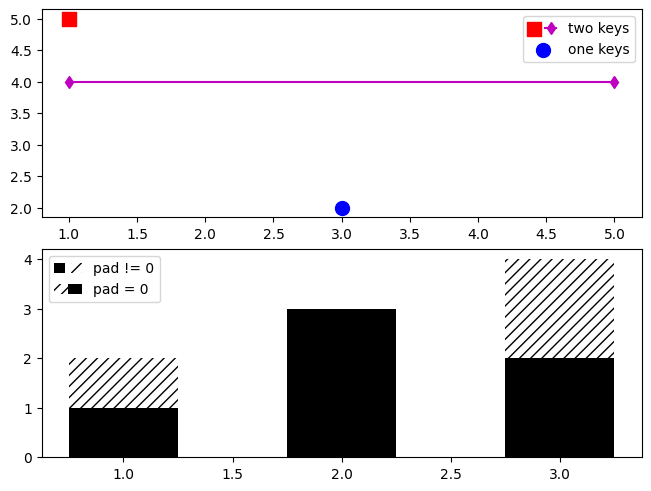

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)

p1 = ax1.scatter([1], [5], c="r", marker="s", s=100)
p2 = ax1.scatter([3], [2], c="b", marker="o", s=100)
p3, = ax1.plot([1, 5], [4, 4], "m-d")
l = ax1.legend(
    [(p1, p3), p2], ["two keys", "one keys"], scatterpoints=1,
    numpoints=1, handler_map={tuple: HandlerTuple(ndivide=None)},
)

x_left = [1, 2, 3]
y_pos = [1, 3, 2]
y_neg = [2, 1, 4]

rneg = ax2.bar(x_left, y_neg, width=0.5, color="w", hatch="///", label="-1")
rpos = ax2.bar(x_left, y_pos, width=0.5, color="k", label="+1")

l = ax2.legend(
    [(rpos, rneg), (rneg, rpos)], ["pad != 0", "pad = 0"],
    handler_map={
        (rpos, rneg): HandlerTuple(ndivide=None),
        (rneg, rpos): HandlerTuple(ndivide=None, pad=0),
    }
)

plt.show()

In [8]:
class HandlerDashedLines(HandlerLineCollection):
    """
    Custom Handler for LineCollection instances.
    """
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        # figure out how many lines there are
        numlines = len(orig_handle.get_segments())
        xdata, xdata_marker = self.get_xdata(legend, xdescent, ydescent, width, height, fontsize)
        
        leglines = []
        # divide the vertical space where the lines will go
        # into equal parts based on the number of lines
        ydata = np.full_like(xdata, height / (numlines + 1))
        # for each line, create the line at the proper location and set the dash pattern
        for i in range(numlines):
            legline = Line2D(xdata, ydata * (numlines - i) - ydescent)
            self.update_prop(legline, orig_handle, legend)
            # set color, dash pattern, and linewidth to that
            # of the lines in linecollection
            try:
                color = orig_handle.get_colors()[i]
            except IndexError:
                color = orig_handle.get_colors()[0]
            
            try:
                dashes = orig_handle.get_dashes()[i]
            except IndexError:
                dashes = orig_handle.get_dashes()[0]
            
            try:
                lw = orig_handle.get_linewidths()[i]
            except IndexError:
                lw = orig_handle.get_linewidths()[0]
            
            if dashes[1] is not None:
                legline.set_dashes(dashes[1])
            
            legline.set_color(color)
            legline.set_transform(trans)
            legline.set_linewidth(lw)
            leglines.append(legline)
        
        return leglines

In [9]:
x = np.linspace(0, 5, 100)
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"][:5]
styles = ["solid", "dashed", "dashed", "dashed", "solid"]
line = [[(0, 0)]]

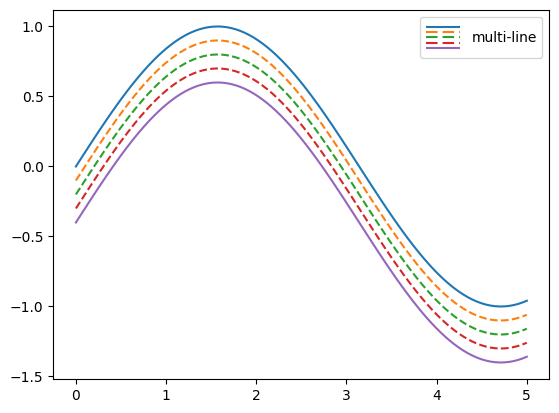

In [10]:
fig, ax = plt.subplots()

for i, color, style in zip(range(5), colors, styles):
    ax.plot(x, np.sin(x) - 0.1 * i, c=color, ls=style)

lc = mcol.LineCollection(5 * line, linestyle=styles, colors=colors)
ax.legend(
    [lc], ["multi-line"], handler_map={
        type(lc): HandlerDashedLines(),
    }, handlelength=2.5, handleheight=3,
)

plt.show()